## Part II, Problem 4.

Let $n\geq 3$ be a positive integer. Prove that $U(2^n)$ is not cyclic.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from math import gcd
from matplotlib.ticker import MaxNLocator
from IPython.display import display, Math

**Definition.** Let $n$ be a positive integer. Define $U(n) = \{ a \in \{ 1, \ldots, n - 1 \} \,\vert\, \gcd(a, n) = 1 \}$ the multiplicative group of integers mod $n$.

In [2]:
def U(n):
    return [a for a in range(n) if gcd(a, n) == 1]

What does $U(2^n)$ look like?

In [3]:
for n in range(3, 8):
    display(Math(rf'U({2**n})')) # fancy latex headings

    print(U(2**n))
    print()

<IPython.core.display.Math object>

[1, 3, 5, 7]



<IPython.core.display.Math object>

[1, 3, 5, 7, 9, 11, 13, 15]



<IPython.core.display.Math object>

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]



<IPython.core.display.Math object>

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63]



<IPython.core.display.Math object>

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127]



<details>
    <summary>✨ Click for explanation.</summary>
    Since the only factors of $2^n$ are powers of $2$, a number will be relatively prime with $2^n$ if it does not have $2$ as a factor, i.e. if it is odd. Therefore $U(2^n)$ is the set of odd numbers between $1$ and $2^n - 1$.
</details>

## Orders of elements in $U(2^n)$

A function that computes the order of an element $a$ in $U(n)$ by computing powers of $a$ until we reach the identity:

In [4]:
def order(a, n):
    count = 1
    while a != 1:
        a = (a * a) % n
        count += 1
    return count

In [5]:
for n in range(3, 8):
    display(Math(rf'\text{{$\lvert a \rvert$ for each $a \in U({2**n})$}}')) # fancy latex headings

    u = U(2**n)
    u_orders = [order(a, 2**n) for a in u]
    print(u_orders)
    print()

<IPython.core.display.Math object>

[1, 2, 2, 2]



<IPython.core.display.Math object>

[1, 3, 3, 2, 2, 3, 3, 2]



<IPython.core.display.Math object>

[1, 4, 4, 3, 3, 4, 4, 2, 2, 4, 4, 3, 3, 4, 4, 2]



<IPython.core.display.Math object>

[1, 5, 5, 4, 4, 5, 5, 3, 3, 5, 5, 4, 4, 5, 5, 2, 2, 5, 5, 4, 4, 5, 5, 3, 3, 5, 5, 4, 4, 5, 5, 2]



<IPython.core.display.Math object>

[1, 6, 6, 5, 5, 6, 6, 4, 4, 6, 6, 5, 5, 6, 6, 3, 3, 6, 6, 5, 5, 6, 6, 4, 4, 6, 6, 5, 5, 6, 6, 2, 2, 6, 6, 5, 5, 6, 6, 4, 4, 6, 6, 5, 5, 6, 6, 3, 3, 6, 6, 5, 5, 6, 6, 4, 4, 6, 6, 5, 5, 6, 6, 2]



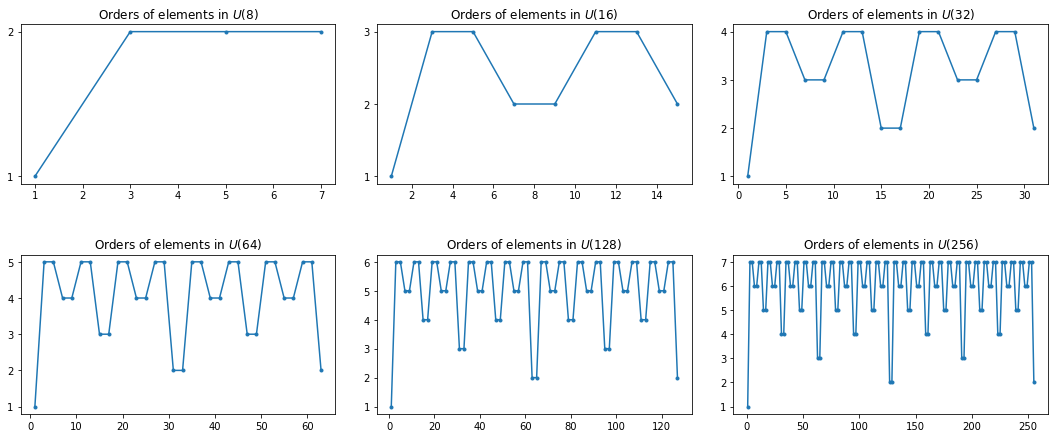

In [6]:
def plot_orders(exponents, num_rows):
    fig, axes = plt.subplots(num_rows, len(exponents) // num_rows, figsize=(15, 3 * num_rows))
    fig.tight_layout(h_pad=5)

    for n, ax in zip(exponents, axes.flatten()):
        ax.set_title(rf'Orders of elements in $U({2**n})$')
        ax.yaxis.set_major_locator(MaxNLocator(integer=True)) # force integer axis ticks

        u = U(2**n)
        u_orders = [order(a, 2**n) for a in u]
        ax.plot(u, u_orders, '.-')

plot_orders([3, 4, 5, 6, 7, 8], num_rows=2)

In [7]:
for n in range(3, 10):
    display(Math(rf'\text{{$(a, \lvert a \rvert)$ for each $a \in U({2**n})$}}')) # fancy latex headings

    print([(a, order(a, 2**n)) for a in U(2**n)])
    print()

<IPython.core.display.Math object>

[(1, 1), (3, 2), (5, 2), (7, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 3), (5, 3), (7, 2), (9, 2), (11, 3), (13, 3), (15, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 4), (5, 4), (7, 3), (9, 3), (11, 4), (13, 4), (15, 2), (17, 2), (19, 4), (21, 4), (23, 3), (25, 3), (27, 4), (29, 4), (31, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 5), (5, 5), (7, 4), (9, 4), (11, 5), (13, 5), (15, 3), (17, 3), (19, 5), (21, 5), (23, 4), (25, 4), (27, 5), (29, 5), (31, 2), (33, 2), (35, 5), (37, 5), (39, 4), (41, 4), (43, 5), (45, 5), (47, 3), (49, 3), (51, 5), (53, 5), (55, 4), (57, 4), (59, 5), (61, 5), (63, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 6), (5, 6), (7, 5), (9, 5), (11, 6), (13, 6), (15, 4), (17, 4), (19, 6), (21, 6), (23, 5), (25, 5), (27, 6), (29, 6), (31, 3), (33, 3), (35, 6), (37, 6), (39, 5), (41, 5), (43, 6), (45, 6), (47, 4), (49, 4), (51, 6), (53, 6), (55, 5), (57, 5), (59, 6), (61, 6), (63, 2), (65, 2), (67, 6), (69, 6), (71, 5), (73, 5), (75, 6), (77, 6), (79, 4), (81, 4), (83, 6), (85, 6), (87, 5), (89, 5), (91, 6), (93, 6), (95, 3), (97, 3), (99, 6), (101, 6), (103, 5), (105, 5), (107, 6), (109, 6), (111, 4), (113, 4), (115, 6), (117, 6), (119, 5), (121, 5), (123, 6), (125, 6), (127, 2)]



<IPython.core.display.Math object>

[(1, 1), (3, 7), (5, 7), (7, 6), (9, 6), (11, 7), (13, 7), (15, 5), (17, 5), (19, 7), (21, 7), (23, 6), (25, 6), (27, 7), (29, 7), (31, 4), (33, 4), (35, 7), (37, 7), (39, 6), (41, 6), (43, 7), (45, 7), (47, 5), (49, 5), (51, 7), (53, 7), (55, 6), (57, 6), (59, 7), (61, 7), (63, 3), (65, 3), (67, 7), (69, 7), (71, 6), (73, 6), (75, 7), (77, 7), (79, 5), (81, 5), (83, 7), (85, 7), (87, 6), (89, 6), (91, 7), (93, 7), (95, 4), (97, 4), (99, 7), (101, 7), (103, 6), (105, 6), (107, 7), (109, 7), (111, 5), (113, 5), (115, 7), (117, 7), (119, 6), (121, 6), (123, 7), (125, 7), (127, 2), (129, 2), (131, 7), (133, 7), (135, 6), (137, 6), (139, 7), (141, 7), (143, 5), (145, 5), (147, 7), (149, 7), (151, 6), (153, 6), (155, 7), (157, 7), (159, 4), (161, 4), (163, 7), (165, 7), (167, 6), (169, 6), (171, 7), (173, 7), (175, 5), (177, 5), (179, 7), (181, 7), (183, 6), (185, 6), (187, 7), (189, 7), (191, 3), (193, 3), (195, 7), (197, 7), (199, 6), (201, 6), (203, 7), (205, 7), (207, 5), (209, 5), (211

<IPython.core.display.Math object>

[(1, 1), (3, 8), (5, 8), (7, 7), (9, 7), (11, 8), (13, 8), (15, 6), (17, 6), (19, 8), (21, 8), (23, 7), (25, 7), (27, 8), (29, 8), (31, 5), (33, 5), (35, 8), (37, 8), (39, 7), (41, 7), (43, 8), (45, 8), (47, 6), (49, 6), (51, 8), (53, 8), (55, 7), (57, 7), (59, 8), (61, 8), (63, 4), (65, 4), (67, 8), (69, 8), (71, 7), (73, 7), (75, 8), (77, 8), (79, 6), (81, 6), (83, 8), (85, 8), (87, 7), (89, 7), (91, 8), (93, 8), (95, 5), (97, 5), (99, 8), (101, 8), (103, 7), (105, 7), (107, 8), (109, 8), (111, 6), (113, 6), (115, 8), (117, 8), (119, 7), (121, 7), (123, 8), (125, 8), (127, 3), (129, 3), (131, 8), (133, 8), (135, 7), (137, 7), (139, 8), (141, 8), (143, 6), (145, 6), (147, 8), (149, 8), (151, 7), (153, 7), (155, 8), (157, 8), (159, 5), (161, 5), (163, 8), (165, 8), (167, 7), (169, 7), (171, 8), (173, 8), (175, 6), (177, 6), (179, 8), (181, 8), (183, 7), (185, 7), (187, 8), (189, 8), (191, 4), (193, 4), (195, 8), (197, 8), (199, 7), (201, 7), (203, 8), (205, 8), (207, 6), (209, 6), (211

<details>
    <summary>✨ What are these elements?</summary>
We notice that the elements $2^{n-1}-1$ and $2^{n-1}+1$ always seem to have order two.
</details>

<details>
    <summary>✨ They are elements of $U(2^n)$</summary>
First consider $2^{n-1}-1$. It is odd, since $2^n$ is even, and it is between $1$ and $2^n$, so it is an element of $U(2^n)$.
    
Similarly, we can show that $2^{n-1}+1$ is an element of $U(2^n)$
</details>

<details>
    <summary>✨ They have order two</summary>
Because $n \geq 3$, we also know that $2^{n-1}-1 \neq 1$, so it does not have order one.

We show that it has order two:
\begin{align*}
    (2^{n-1} - 1)^2 &= 2^{2n-2} - 2^n + 1 &\text{(expand with FOIL)}\\
    &= 2^n (2^{n-2} - 1) + 1 &\text{(factor out $2^n$)}
\end{align*}

Since $n \geq 3$, we know that $n - 2 \geq 1$, therefore $(2^{n-2} - 1)$ is an integer. Then we can write $(2^{n-1}-1)^2 \bmod 2^n = 1$, so we have shown that it has order two.

    
We can show using the same process that $2^{n-1}+1$ also has order two.
</details

<details>
    <summary>✨ They form subgroups of order two</summary>
Then $\{1,\, 2^{n-1}-1\}$ and $\{1,\, 2^{n-1}+1\}$ are subgroups of $U(2^n)$.
</details>

<details>
    <summary>✨ Conclusion</summary>
We have shown that there are at least two subgroups of order two, so the subgroup of order $2$ is not unique. This violates the third claim of the fundamental theorem of cyclic groups, so $U(2^n)$ must not be cyclic.
</details>